#1. A

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [47]:
#pemanggilan data
data = pd.read_csv("produk_elektronik (1).csv")

In [48]:
data.head()

,produk_id,nama_produk,kategori,harga,rating,jumlah_ulasan,negara_asal
0,1,Produk_1,Smartwatch,746.0,4.2,273.0,Japan
1,2,Produk_2,Headphone,241.0,3.5,239.0,Canada
2,3,Produk_3,Tablet,810.0,3.8,209.0,Canada
3,4,Produk_4,Headphone,303.0,3.2,59.0,South Korea
4,5,Produk_5,Headphone,252.0,3.7,76.0,South Korea


In [49]:
data.tail(5)

,produk_id,nama_produk,kategori,harga,rating,jumlah_ulasan,negara_asal
545,546,Produk_546,Laptop,496.0,3.9,19.0,China
546,547,Produk_547,Headphone,628.0,4.7,414.0,USA
547,548,Produk_548,Tablet,465.0,4.3,393.0,India
548,549,Produk_549,Laptop,495.0,3.1,311.0,Germany
549,550,Produk_550,Tablet,388.0,4.3,240.0,Germany


In [50]:
#melihat statistika deskriptif
data.describe()

,produk_id,harga,rating,jumlah_ulasan
count,550.000000,520.000000,500.000000,530.000000
mean,275.500000,565.715385,4.005600,259.671698
std,158.915596,625.886725,0.571052,142.655380
min,1.000000,-213.000000,3.000000,12.000000
25%,138.250000,374.000000,3.500000,139.000000
50%,275.500000,516.000000,4.000000,262.500000
75%,412.750000,656.250000,4.500000,390.750000
max,550.000000,8341.000000,5.000000,499.000000


#1. B

**Tampilkan informasi tipe data setiap kolom dan cek apakah ada missing values.**

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   produk_id      550 non-null    int64  
 1   nama_produk    550 non-null    object 
 2   kategori       550 non-null    object 
 3   harga          520 non-null    float64
 4   rating         500 non-null    float64
 5   jumlah_ulasan  530 non-null    float64
 6   negara_asal    550 non-null    object 
dtypes: float64(3), int64(1), object(3)
memory usage: 30.2+ KB


Berdasarkan output diatas, dapat disimpulkan bahwa dataset tersebut, memiliki total: 7 kolom, dengan jumlah maksimal baris untuk setiap kolom sebanyak: 550 baris. Akan tetapi terdapat beberapa kolom yang memiliki jumlah baris < 550, maka akan dilakukan proses identifikasi lebih lanjut.

#2. A

**Cek missing values pada dataset. Berapa jumlah missing values di setiap kolom?**

In [9]:
data.isnull()

,produk_id,nama_produk,kategori,harga,rating,jumlah_ulasan,negara_asal
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
545,False,False,False,False,False,False,False
546,False,False,False,False,False,False,False
547,False,False,False,False,False,False,False
548,False,False,False,False,False,False,False


In [10]:
np.sum(data.isnull())

/usr/local/lib/python3.11/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


,0
produk_id,0
nama_produk,0
kategori,0
harga,30
rating,50
jumlah_ulasan,20
negara_asal,0


Berdasarkan output summarize tersebut, diperoleh bahwa kolom yang mengandung Missing Values (blanks/ N/A (Python : nan atau NaN)) adalah kolom harga, rating, dan jumlah_ulasan. Terdapat sebanyak 30 missing values pada kolom harga, 50 pada kolom rating, dan 20 pada kolom jumlah_ulasan.

In [11]:
#mengetahui jumlah missing value di seluruh dataset
data.isnull().sum().sum()

100

Sehingga terdapat 100 missing values pada data tersebut.

#2. B

**Jelaskan bagaimana keberadaan missing values dapat memengaruhi analisis data.**

Keberadaan Missing Values dapat mempengaruhi hasil analisis statistik pada data sehingga dapat mengurangi tingkat keakuratan data. Missing Values yang tidak diatasi dapat menyebabkan kesalahan hasil analisis dan kesimpulan yang tidak sesuai dengan yang diharapkan. Missing Values juga dapat mengubah distribusi data. Jika missing values berasal dari kategori dengan karakteristik tertentu maka dapat menyebabkan hasil yang tidak akurat dan tidak dapat digeneralisasi Selain itu, terdapat beberapa algoritma mechine learning yang tidak memperbolehkan adanya missing value dalam sebuah data. Sehingga perlu dilakukan imputasi atau penghapusan data yang hilang sebelum digunakan dalam pemodelan.

Imputasi adalah metode mengganti nilai yang hilang dengan nilai lain, seperti mean (rata-rata), median, modus, interpolasi, atau menggunakan model prediktif untuk memperkirakan missing values. Imputasi dipilih jika missing values cukup banyak dan tidak boleh dihapus karena masih memiliki informasi penting. Misalnya, jika harga produk hilang, menggantinya dengan median lebih baik daripada menghapus seluruh data produk tersebut.

Penghapusan data dilakukan jika jumlah missing values sangat sedikit atau jika data yang hilang tidak terlalu berdampak pada analisis keseluruhan. Misalnya, jika suatu baris memiliki banyak kolom kosong, menghapusnya bisa menjadi pilihan yang lebih baik daripada melakukan imputasi.

#2. C

**Tentukan metode yang paling sesuai untuk menangani missing values di setiap kolom. Berikan alasan pemilihan metode tersebut.**

1. Kolom harga menggunakan median karena data harga produk elektronik tersebut tidak berdistribusi normal, dan terdapat beberapa harga produk elektronik yang sangat tinggi dibandingkan dengan produk lainnya.
2. Kolom rating menggunakan mean karena ratting memiliki rentang yang sama, misalnya 1 sampai 5 sehingga tidak ada skewed yang dapat mempengaruhi hasil.
3. Kolom jumlah_ulasan menggunakan median karena beberapa produk memiliki jumlah ulasan yang tinggi sementara sebagian produk memiliki sedikit ulasan, sehingga menyebabkan data jumlah ulasan tidak berdistribusi normal. Median lebih stabil dibandingkan mean karena tidak terpengaruh oleh nilai ekstrem atau distribusi yang tidak simetris.

#2. D

**Tangani missing values dengan metode yang sesuai**

**Menangani missing values pada kolom harga dengan metode imputasi menggunakan median**

In [12]:
#melihat isi dalam kolom harga
data['harga'].unique()

array([ 7.460e+02,  2.410e+02,  8.100e+02,  3.030e+02,  2.520e+02,
        3.350e+02,  8.900e+02,  4.910e+02,  6.050e+02,  4.630e+02,
        4.810e+02,  3.980e+02,  5.100e+02,  5.980e+02,  8.350e+02,
        1.250e+02,  8.220e+02,  4.260e+02,  3.900e+02,  7.080e+02,
        5.450e+02,        nan,  5.720e+02,  7.280e+02,  6.710e+02,
        3.740e+02,  2.310e+02,  4.340e+02,  1.150e+03,  3.310e+02,
        5.780e+02,  4.750e+02,  4.590e+02,  9.040e+02,  4.970e+02,
        5.400e+02,  3.390e+02,  2.110e+02,  8.620e+02,  5.800e+02,
        5.180e+02,  5.160e+02,  4.480e+02,  7.360e+02,  2.280e+02,
        1.830e+02,  5.150e+02,  7.120e+02,  5.470e+02,  4.360e+02,
        5.910e+02,  5.370e+02,  6.650e+02,  7.650e+02,  3.090e+02,
        4.290e+02,  2.960e+02,  6.660e+02,  3.550e+02,  1.240e+02,
        3.850e+02,  2.010e+02,  8.180e+02,  5.940e+02,  6.290e+02,
        6.070e+02,  6.680e+02,  7.260e+02,  3.920e+02,  2.160e+02,
        3.300e+02,  4.900e+02, -1.200e+01,  1.200e+02,  6.190e

In [13]:
#jumlah missing value
np.sum(data['harga'].isnull())

30

Berdasarkan output tersebut, dapat dilihat bahwa kolom tersebut mengandung Missing Values sebanyak 30. Pada kasus ini, masing-masing Missing Values tersebut akan diganti dengan median dari harga keseluruhan produk.

In [14]:
#mengisi missing value
data['harga']=data['harga'].fillna(data['harga'].median())

In [15]:
#jumlah missing value
np.sum(data['harga'].isnull())

0

Setelah Missing Values diganti dengan median keseluruhan harga produk, diperoleh Missing Value pada kolom harga menjadi 0 atau sudah tidak ada Missing Value pada kolom harga.

In [22]:
#melihat isi dalam kolom
data['harga'].unique()

array([ 7.460e+02,  2.410e+02,  8.100e+02,  3.030e+02,  2.520e+02,
        3.350e+02,  8.900e+02,  4.910e+02,  6.050e+02,  4.630e+02,
        4.810e+02,  3.980e+02,  5.100e+02,  5.980e+02,  8.350e+02,
        1.250e+02,  8.220e+02,  4.260e+02,  3.900e+02,  7.080e+02,
        5.450e+02,  5.160e+02,  5.720e+02,  7.280e+02,  6.710e+02,
        3.740e+02,  2.310e+02,  4.340e+02,  1.150e+03,  3.310e+02,
        5.780e+02,  4.750e+02,  4.590e+02,  9.040e+02,  4.970e+02,
        5.400e+02,  3.390e+02,  2.110e+02,  8.620e+02,  5.800e+02,
        5.180e+02,  4.480e+02,  7.360e+02,  2.280e+02,  1.830e+02,
        5.150e+02,  7.120e+02,  5.470e+02,  4.360e+02,  5.910e+02,
        5.370e+02,  6.650e+02,  7.650e+02,  3.090e+02,  4.290e+02,
        2.960e+02,  6.660e+02,  3.550e+02,  1.240e+02,  3.850e+02,
        2.010e+02,  8.180e+02,  5.940e+02,  6.290e+02,  6.070e+02,
        6.680e+02,  7.260e+02,  3.920e+02,  2.160e+02,  3.300e+02,
        4.900e+02, -1.200e+01,  1.200e+02,  6.190e+02,  4.660e

**Menangani missing values pada kolom rating dengan metode imputasi menggunakan mean**

In [16]:
#melihat isi dalam kolom
data['rating'].unique()

array([4.2, 3.5, 3.8, 3.2, 3.7, 4. , 4.5, 3. , 3.9, 3.6, 4.7, 4.4, nan,
       3.1, 4.9, 4.6, 5. , 4.8, 4.3, 3.4, 4.1, 3.3])

In [17]:
#jumlah missing value
np.sum(data['rating'].isnull())

50

Berdasarkan output tersebut, dapat dilihat bahwa kolom rating tersebut mengandung Missing Values sebanyak 50. Pada kasus ini, masing-masing Missing Values tersebut akan diganti dengan mean dari rating keseluruhan produk.

In [18]:
#mengisi missing value
data['rating']=data['rating'].fillna(data['rating'].mean())

In [19]:
#jumlah missing value
np.sum(data['rating'].isnull())

0

Setelah Missing Values diganti dengan mean keseluruhan rating produk, diperoleh Missing Value pada kolom rating menjadi 0 atau sudah tidak ada Missing Value pada kolom rating.

In [20]:
#melihat isi dalam kolom
data['rating'].unique()

array([4.2   , 3.5   , 3.8   , 3.2   , 3.7   , 4.    , 4.5   , 3.    ,
       3.9   , 3.6   , 4.7   , 4.4   , 4.0056, 3.1   , 4.9   , 4.6   ,
       5.    , 4.8   , 4.3   , 3.4   , 4.1   , 3.3   ])

**Menangani missing values pada kolom jumlah_ulasan dengan metode imputasi menggunakan median**

In [21]:
#melihat isi dalam kolom
data['jumlah_ulasan'].unique()

array([273., 239., 209.,  59.,  76., 309., 390.,  67., 268.,  nan, 335.,
       139., 224., 181., 267., 111., 218., 300., 363., 480., 295., 125.,
       159., 451.,  45., 462., 342., 486., 296., 312., 320., 217., 115.,
       455., 167., 130.,  64., 409.,  21., 154., 405., 145., 477.,  12.,
       153.,  39., 246., 288., 357., 113., 127.,  14., 257., 373., 330.,
       158.,  93., 463., 475., 465., 240., 297., 170., 281., 469.,  47.,
       235., 151., 301., 490., 160., 123.,  75., 370., 350., 484., 258.,
       466., 458., 340., 332., 189., 199., 416., 163., 205., 271., 428.,
       415., 436., 152., 351., 110., 253., 499., 248.,  58.,  51., 175.,
        91., 438., 225., 471., 143., 345.,  16., 445.,  23.,  82., 408.,
       414., 172., 356., 215., 285., 265., 275.,  34., 459., 290., 262.,
       319., 298., 173., 104., 119., 247., 396., 492., 434., 399., 150.,
       126., 491., 401., 461.,  88.,  77., 182., 453., 137., 105., 101.,
        40., 343.,  29., 155., 325., 456., 169., 35

In [23]:
#jumlah missing value
np.sum(data['jumlah_ulasan'].isnull())

20

Berdasarkan output tersebut, dapat dilihat bahwa kolom jumlah_ulasan tersebut mengandung Missing Values sebanyak 20. Pada kasus ini, masing-masing Missing Values tersebut akan diganti dengan median dari jumlah_ulasan keseluruhan produk.

In [24]:
#mengisi missing value
data['jumlah_ulasan']=data['jumlah_ulasan'].fillna(data['jumlah_ulasan'].mean())

In [25]:
#jumlah missing value
np.sum(data['rating'].isnull())

0

Setelah Missing Values diganti dengan mean keseluruhan jumlah_ulasan produk, diperoleh Missing Value pada kolom jumlah_ulasan menjadi 0 atau sudah tidak ada Missing Value pada kolom jumlah_ulasan

In [26]:
#melihat isi dalam kolom
data['jumlah_ulasan'].unique()

array([273.        , 239.        , 209.        ,  59.        ,
        76.        , 309.        , 390.        ,  67.        ,
       268.        , 259.67169811, 335.        , 139.        ,
       224.        , 181.        , 267.        , 111.        ,
       218.        , 300.        , 363.        , 480.        ,
       295.        , 125.        , 159.        , 451.        ,
        45.        , 462.        , 342.        , 486.        ,
       296.        , 312.        , 320.        , 217.        ,
       115.        , 455.        , 167.        , 130.        ,
        64.        , 409.        ,  21.        , 154.        ,
       405.        , 145.        , 477.        ,  12.        ,
       153.        ,  39.        , 246.        , 288.        ,
       357.        , 113.        , 127.        ,  14.        ,
       257.        , 373.        , 330.        , 158.        ,
        93.        , 463.        , 475.        , 465.        ,
       240.        , 297.        , 170.        , 281.  

**Mengecek jumlah missing value pada setiap kolom setelah dilakukan imputasi**

In [27]:
np.sum(data.isnull())

,0
produk_id,0
nama_produk,0
kategori,0
harga,0
rating,0
jumlah_ulasan,0
negara_asal,0


In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   produk_id      550 non-null    int64  
 1   nama_produk    550 non-null    object 
 2   kategori       550 non-null    object 
 3   harga          550 non-null    float64
 4   rating         550 non-null    float64
 5   jumlah_ulasan  550 non-null    float64
 6   negara_asal    550 non-null    object 
dtypes: float64(3), int64(1), object(3)
memory usage: 30.2+ KB


Diperoleh kolom harga produk, ratting dan jumlah_ulasan sudah tidak mengandung Missing Value, dan seluruh kolom pada data tersebut memiliki jumlah yang sama, yaitu 550 baris.

#3. A

**Identifikasi outlier dalam database**

Menggunakan Boxplot

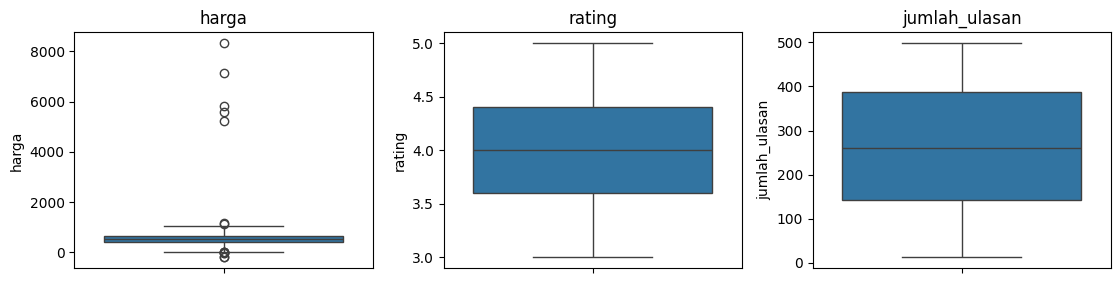

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Kolom numerik yang ingin dicek outliernya
num_cols = ['harga', 'rating', 'jumlah_ulasan']
# Visualisasi Boxplot
plt.figure(figsize=(15, 8))
for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 4, i)
    sns.boxplot(y=data[col])
    plt.title(col)
plt.tight_layout()
plt.show()

Berdasarkan Boxplot diperoleh:

Pada kolom harga terdapat banyak titik di atas whisker, yang menunjukkan adanya harga yang sangat tinggi dibandingkan dengan nilai lainnya. Ini menandakan bahwa harga memiliki outlier.
Pada kolom rating semua nilai berada dalam batas whisker, tanpa titik di luar rentang. Ini menunjukkan bahwa rating terdistribusi dengan baik dan tidak memiliki outlier.
Pada kolom jumlah_ulasan tidak ada titik di luar whisker, sehingga jumlah ulasan tidak memiliki outlier yang signifikan.

Menggunakan IQR

In [30]:
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)  # Kuartil 1
    Q3 = data[column].quantile(0.75)  # Kuartil 3
    IQR = Q3 - Q1  # Rentang interkuartil
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] < lower_bound) | (data[column] > upper_bound)]
# Cek jumlah outlier untuk setiap kolom numerik
for col in num_cols:
    outliers = detect_outliers_iqr(data, col)
    print(f"{col}: {len(outliers)} outliers")

harga: 14 outliers
rating: 0 outliers
jumlah_ulasan: 0 outliers


Berdasarkan IQR diperoleh bahwa terdapat 14 outlier pada kolom harga, 0 outlier pada kolom rating dan jumlah_ulasan.

#3. B

**Apa dampak dari keberadaan outlier terhadap analisis?**

1. Keberadaan outlier dapat menyebabkan hasil analisis statistik dan model prediksi menyimpang. Jika outlier tidak diidentifikasi dan diatasi, pola umum dalam data tersebut akan berubah dan menghasilkan kesimpulan yang tidak tepat.
2. Outlier dapat memengaruhi distribusi data secara keseluruhan dan mengganggu asumsi dasar dalam metode analisis data. Dengan mendeteksi dan mengatasi outlier, data analyst akan menjaga konsistensi dan validitas dari hasil analisis.
3. Outlier juga bisa menjadi indikator adanya kecurangan atau kesalahan dalam data.

#3. C

Pilih metode yang sesuai untuk menangani outlier dan jelaskan alasan pemilihannya.

Untuk menangani outlier pada kolom harga, metode yang sesuai adalah Winsorizing karena metode ini menggantikan nilai outlier dengan nilai yang ada pada persentil tertentu, sehingga dapat mempertahankan semua data tanpa harus menghapusnya. Selain itu, harga produk tidak berdistribusi normal dan terdapat nilai ekstrem yang jauh lebih tinggi dibandingkan dengan harga produk lainnya.Penggunaan Winsorizing dapat mengurangi pengaruh nilai ekstrem terhadap analisis tanpa menyebabkan kehilangan informasi penting. Selain itu, metode ini lebih stabil dibandingkan trimming (penghapusan outlier), terutama jika outlier masih memiliki makna dalam konteks bisnis atau analisis harga produk.

#3. D

**Tangani outlier dengan metode yang sesuai, atau jika memilih tidak menangani outlier berikan alasannya.**

A. Winsorizing (Mengganti Outlier dengan Batas IQR)

In [31]:
def winsorize_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data[column] = np.where(data[column] < lower_bound, lower_bound, data[column])
    data[column] = np.where(data[column] > upper_bound, upper_bound, data[column])

# Terapkan Winsorizing
for col in num_cols:
    winsorize_iqr(data, col)

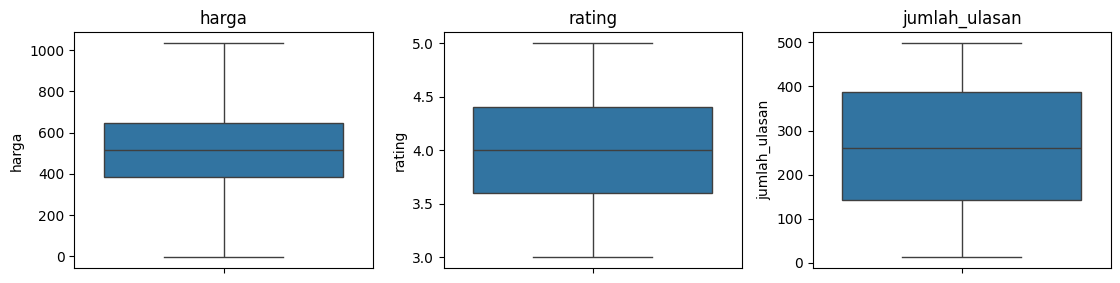

In [32]:
#cek boxplot lagi

num_cols = ['harga','rating','jumlah_ulasan' ]

# Visualisasi Boxplot
plt.figure(figsize=(15, 8))
for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 4, i)
    sns.boxplot(y=data[col])
    plt.title(col)
plt.tight_layout()
plt.show()

Setelah outlier ditangani dengan metode Winsorizing, cek kembali menggunakan Boxplot sehingga tidak ada lagi titik di atas whisker yang menandakan sudah tidak adanya outlier.

#4. A.

**Kategori**

In [33]:
#melihat isi dalam kolom
data['kategori'].unique()

array(['Smartwatch', 'Headphone', 'Tablet', 'Laptop', 'Camera',
       'Smartphone'], dtype=object)

In [35]:
from sklearn.preprocessing import OneHotEncoder
One_encoder = OneHotEncoder()

In [37]:
One_encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False).set_output(transform='pandas')

In [38]:
encoded_kategori = One_encoder.fit_transform(data[['kategori']])

In [39]:
encoded_kategori

,kategori_Camera,kategori_Headphone,kategori_Laptop,kategori_Smartphone,kategori_Smartwatch,kategori_Tablet
0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...
545,0.0,0.0,1.0,0.0,0.0,0.0
546,0.0,1.0,0.0,0.0,0.0,0.0
547,0.0,0.0,0.0,0.0,0.0,1.0
548,0.0,0.0,1.0,0.0,0.0,0.0


**Negara Asal**

In [40]:
#melihat isi dalam kolom
data['negara_asal'].unique()

array(['Japan', 'Canada', 'South Korea', 'France', 'USA', 'Germany',
       'China', 'India', 'UK'], dtype=object)

In [41]:
from sklearn.preprocessing import OneHotEncoder
One_encoder = OneHotEncoder()

In [42]:
One_encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False).set_output(transform='pandas')

In [43]:
encoded_negara = One_encoder.fit_transform(data[['negara_asal']])

In [44]:
encoded_negara

,negara_asal_Canada,negara_asal_China,negara_asal_France,negara_asal_Germany,negara_asal_India,negara_asal_Japan,negara_asal_South Korea,negara_asal_UK,negara_asal_USA
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
545,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
546,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
547,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
548,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   produk_id      550 non-null    int64  
 1   nama_produk    550 non-null    object 
 2   kategori       550 non-null    object 
 3   harga          550 non-null    float64
 4   rating         550 non-null    float64
 5   jumlah_ulasan  550 non-null    float64
 6   negara_asal    550 non-null    object 
dtypes: float64(3), int64(1), object(3)
memory usage: 30.2+ KB


#4. B

**Bandingkan berbagai metode encoding dan pilih metode yang paling sesuai untuk
setiap kolom. Jelaskan alasan pemilihan metode tersebut.**

Metode encoding yang dapat digunakan untuk kolom kategori produk dan negara asal antara lain One Hot Encoding, Target Encoding, dan Label Encoding.

Encoding untuk kolom kategori produk.
Metode yang dapat digunakan antara lain:
- One-Hot Encoding lebih cocok karena kategori produk bersifat nominal (tidak ada urutan tertentu).
- Label Encoding dan Ordinal Encoding tidak cocok karena bisa membuat algoritma machine learning menganggap ada hubungan hierarkis antar kategori (misalnya "Camera" lebih besar dari "Laptop", padahal tidak ada hubungan seperti itu).

Encoding untuk kolom negara asal.
- Jika jumlah negara sedikit (misalnya hanya 9 negara), One-Hot Encoding lebih baik karena tidak memperkenalkan hubungan numerik yang salah.
- Jika jumlah negara banyak, Target Encoding atau Frequency Encoding bisa lebih efisien untuk menghindari ledakan dimensi.
- Label Encoding tidak direkomendasikan karena bisa menyebabkan algoritma menganggap ada hubungan numerik antar negara.